In [1]:
import os 
import pickle 
from natsort import natsorted


def load_data_as_dict(directory_path): 
    entries = os.listdir(directory_path)
    files = natsorted([entry for entry in entries if os.path.isfile(os.path.join(directory_path, entry))])
    list_of_dict = []
    list_of_uuid = []
    for file_name in files: 
        file_path = os.path.join(directory_path,file_name)
        with open(file_path, 'rb') as file: 
            dict = pickle.load(file)
            list_of_dict.append(dict)

            uuid = dict['task_dag'].id 
            if uuid not in list_of_uuid:
                list_of_uuid.append(uuid)
    return list_of_dict, list_of_uuid

In [3]:

data_7, _ = load_data_as_dict('data/task_7')
print(f"----KEYS in the DICT----")
for key in (list(data_7[0].keys())): 
    print(key)

print(f"\n----Vars in task_dag----")
for mem_var in list(vars(data_7[0]["task_dag"]).items()):
    print(mem_var)

----KEYS in the DICT----
task_dag
network
map
sim_successfull_flag
network_processing_time
sim_exec_time
lost_packets
avg_flit_lat
avg_packet_lat
avg_network_lat

----Vars in task_dag----
('num_nodes', 7)
('max_out', 1)
('alpha', 0.5)
('beta', 0.0)
('position', {'Start': (0, 5.5), 'Exit': (18, 5.5), 1: (3, 1), 2: (3, 6), 3: (6, 1), 4: (9, 1), 5: (12, 1), 6: (12, 6), 7: (15, 1)})
('id', 'b8ec2036-e421-4a39-9a67-fc0f1f57d145')
('graph', <networkx.classes.digraph.DiGraph object at 0x7feb1b80e0a0>)
('edge_attr', {(1, 3): 10, (3, 4): 10, (2, 3): 10, (4, 5): 10, (5, 7): 10, (7, 'Exit'): 10, (6, 7): 10, ('Start', 1): 10, ('Start', 2): 10, ('Start', 6): 10})
('node_attr', {1: 10, 3: 10, 2: 10, 4: 10, 5: 10, 7: 10, 6: 10, 'Start': 1, 'Exit': 1})


In [4]:
from networkx.algorithms.isomorphism import GraphMatcher
def isomorphic(graph1, graph2):
    """
    Two graphs which contain the same number of 
    graph vertices connected in the same way 
    are said to be isomorphic. 
    """
    GM = GraphMatcher(graph1, graph2)
    return GM.is_isomorphic()


isomorphic_groups = []
list_of_same_graphs = []

for data in data_7:
    graph = data['task_dag'].graph
    added_to_group = False
    
    # Iterate through isomorphic groups
    for graph_group, data_group in zip(isomorphic_groups, list_of_same_graphs):
        if isomorphic(graph, graph_group[0]):
            graph_group.append(graph)
            data_group.append(data)
            added_to_group = True
            break

    if not added_to_group:
        # If no isomorphic group found, create a new one
        isomorphic_groups.append([graph])
        list_of_same_graphs.append([data])

# Check if two graphs are similar 
    # idea 1 -> comapre edge index (not ideal)
    # idea 2 -> nx.is_isomorphic 

518
518
[215, 89, 61, 3, 325, 267, 479, 150, 8402, 25, 85, 244, 19, 87, 55, 63, 271, 90, 4, 9, 17, 85, 38, 93, 161, 102, 37, 45, 209, 148, 84, 14, 125, 50, 46, 251, 59, 65, 146, 111, 93, 182, 74, 29, 32, 171, 140, 94, 14, 28, 114, 83, 34, 9, 40, 14, 197, 230, 130, 17, 9, 93, 101, 236, 78, 24, 139, 206, 197, 56, 34, 58, 84, 11, 60, 112, 41, 42, 42, 27, 20, 15, 32, 51, 79, 8, 7, 62, 263, 89, 19, 40, 44, 2, 59, 12, 46, 68, 6, 187, 16, 54, 39, 4, 103, 97, 21, 198, 45, 277, 57, 1, 305, 36, 23, 108, 19, 62, 13, 46, 12, 59, 129, 87, 60, 96, 70, 53, 34, 56, 45, 112, 134, 12, 93, 175, 58, 4, 13, 139, 43, 49, 10, 8, 5, 55, 52, 114, 133, 50, 5, 49, 35, 69, 2, 25, 17, 9, 18, 196, 13, 79, 19, 2, 40, 51, 1, 14, 57, 46, 9, 11, 28, 59, 72, 61, 11, 67, 96, 4, 70, 1, 48, 2, 22, 31, 57, 31, 12, 31, 49, 21, 6, 2, 50, 55, 2, 10, 57, 1, 41, 11, 46, 59, 14, 12, 4, 6, 7, 2, 18, 20, 13, 50, 23, 14, 4, 12, 2, 80, 37, 10, 18, 57, 10, 32, 16, 13, 21, 3, 3, 1, 1, 3, 17, 16, 4, 3, 50, 25, 7, 1, 57, 6, 6, 22, 17, 16

Text(0.5, 1.0, 'Plotting a List of Values')

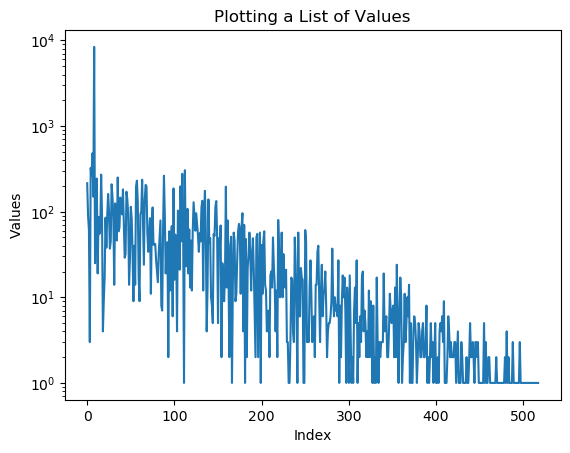

In [11]:
"""
Checking if they contain the same graphs 
"""
print(len(isomorphic_groups))
print(len(list_of_same_graphs))


num_similar_list = []
for i in list_of_same_graphs:
    num_similar_graph = len(i)
    num_similar_list.append(num_similar_graph)

print(num_similar_list)
import matplotlib.pyplot as plt 
plt.plot(num_similar_list)
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plotting a List of Values')

Random Index is 57
Number of same dags in the list 230

{0: 23, 1: 30, 2: 21, 3: 16, 4: 20, 5: 19, 6: 24, 7: 17, 8: 26}


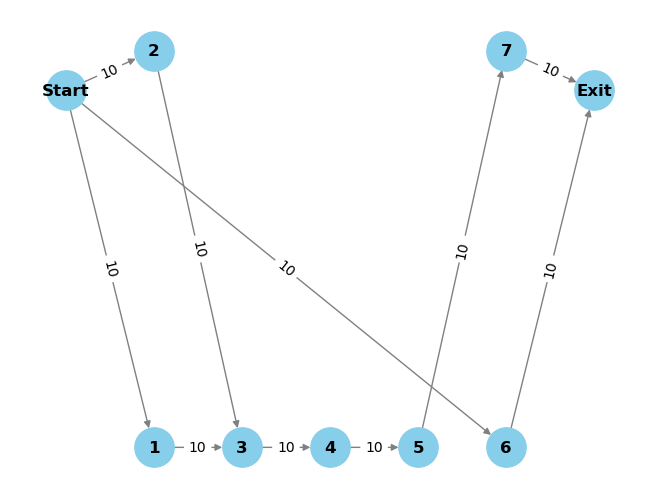


{0: 22, 1: 23, 2: 30, 3: 27, 4: 29, 5: 18, 6: 21, 7: 28, 8: 19}


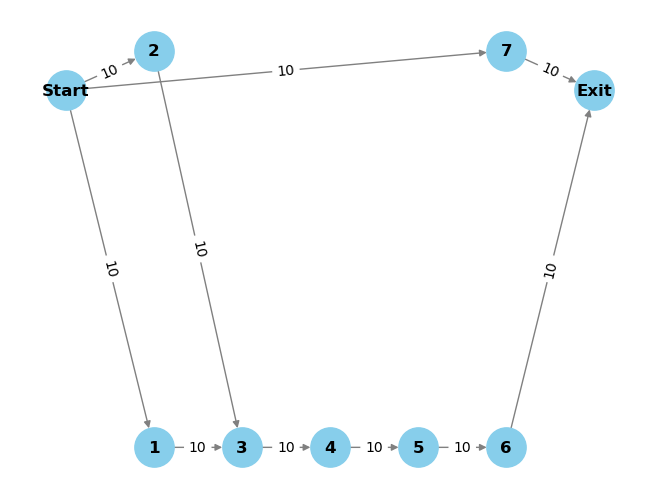

In [30]:
import random 
random.seed(2)

graph_index = random.randint(0,len(list_of_same_graphs))
print(f"Random Index is {graph_index}")

list_of_dict = list_of_same_graphs[graph_index]
print(f"Number of same dags in the list {len(list_of_dict)}")


data = list_of_dict[0]
data_1 = data['task_dag']
map_1 = data['map']
print(f"\n{map_1}")
data_1.plot(show_node_attrib=False)

data = list_of_dict[5]
data_2 = data['task_dag']
map_2 = data['map']
print(f"\n{map_2}")
data_2.plot(show_node_attrib=False)

In [31]:
list_of_latency = []
for data in list_of_dict:
    latency = data['network_processing_time']
    list_of_latency.append(latency)

In [57]:
import pandas as pd 
df = pd.DataFrame(data_7)
print(df.columns)
df['network_processing_time'] = pd.to_numeric(df['network_processing_time'])
print(df['network_processing_time'].describe())

import numpy as np

print(f"\nLatency Results")
list_of_latency = np.array(list_of_latency, dtype=np.float64)
print(f"Min {np.min(list_of_latency)}")
print(f"Max {np.max(list_of_latency)}")
print(f"Median {np.median(list_of_latency)}")
print(result)

Index(['task_dag', 'network', 'map', 'sim_successfull_flag',
       'network_processing_time', 'sim_exec_time', 'lost_packets',
       'avg_flit_lat', 'avg_packet_lat', 'avg_network_lat'],
      dtype='object')
count    24800.000000
mean      2324.266573
std        428.601616
min       1027.000000
25%       2034.000000
50%       2332.000000
75%       2677.000000
max       3595.000000
Name: network_processing_time, dtype: float64
DescribeResult(nobs=230, minmax=(2074.0, 2649.0), mean=2138.830434782609, variance=10690.158895006647, skewness=2.2403707370853727, kurtosis=3.9272508872814162)
